
# Analysis TMDB-Project (The Movie Database)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> My analysis will be on TMDb movies dataset.

> This dataset is about 10,000 movies were collected from TMDb (The Movie Database), it consists of 21 columns like (imdb_id, revenue, budget, vote_count etc).

> **Question that can analyised from this data set**
> 1. What properties are associated with highly rated movies?
> 2.Is the movie rating influence the revenue?
> 3.Are higher budget movie get higher revinue?
> 4.What other properties reflect the movies that have high revenues?

In [53]:
# Here we'll import important libraries that we'll use.
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
# Takes a date as a string, and return a python datetime object.
# If there is no date given, return None.
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%dT%H:%M:%s%fZ')

<a id='wrangling'></a>
## Data Wrangling

> Ok, We saw a preface of the dataset and what does consist of, then we asked some question that we would answer them, and we imported useful libraries, so we'll go to load data and take a look to see if there is any problem that can deal with.
> So we're going to Assess, clean, and preparing the data.

### General Properties

In [55]:
# Load the data
df = pd.read_csv('tmdb-movies.csv')
# Take a loot at it.
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [57]:
# Check for NaN values.
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

\>\> *From above, we can see there are a lot of NaN values that we should deal with them.*


### Data Cleaning (Replace this with more specific notes!)

In [58]:
# Check for duplicates.
print(df.shape)
df.duplicated().sum()

(10866, 21)


1

In [59]:
#remove one duplicated row
df.drop_duplicates(inplace = True)
#check to see if row removed
df.shape

(10865, 21)

In [60]:
#remove unnecessary columns
df.drop(['id', 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

\>\> *Here, I removed any unnecessary columns that provide little to no quantifiable value so that the table only contains information pertinent to my analysis.*

**imdb_id**: This value is not necessary in analyzing information within the table.

**homepage, tagline, overview, keywords**: These values are unique to each row and cannot be used to make comparisons across multiple rows.

**budget, revenue**: Since the 'budget_adj' and 'revenue_adj' columns adjust the budget and revenue values in terms of 2010 dollars and will therefore allow for more accurate comparisons and analysis, these columns are not needed.

**release_date**: I will be using release year to analyze this data, so this more specific column is not needed.
> *and etc...*

In [61]:
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

#### The genre have 23 missing values and becuase it is not a measure and it's not too much. So I'm going to drop the rows.



In [62]:
#rename columns for better readability
df.rename(columns = {'budget_adj':'budget', 'revenue_adj':'revenue'}, inplace=True)
# We renamed two columns above to make them more readable.
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10865 non-null  float64
 1   budget          10865 non-null  int64  
 2   revenue         10865 non-null  int64  
 3   original_title  10865 non-null  object 
 4   runtime         10865 non-null  int64  
 5   genres          10842 non-null  object 
 6   release_date    10865 non-null  object 
 7   vote_count      10865 non-null  int64  
 8   vote_average    10865 non-null  float64
 9   release_year    10865 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 933.7+ KB


,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015


In [63]:
#remove rows with null values
df.dropna(inplace = True)
df.isnull().sum()
df.shape

(10842, 10)

*After dropping rows with null values, rows become 10842 rows from 10866 rows*

*Here, we're going to deal with genres column and make it much easier to work with*

>Now I'm going to drop all zero revenues and budgets to not effects negatively on the analysis

In [64]:
df.drop(df[df.budget == 0].index, inplace=True)

In [65]:
df.drop(df[df.revenue == 0].index, inplace=True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      3854 non-null   float64
 1   budget          3854 non-null   int64  
 2   revenue         3854 non-null   int64  
 3   original_title  3854 non-null   object 
 4   runtime         3854 non-null   int64  
 5   genres          3854 non-null   object 
 6   release_date    3854 non-null   object 
 7   vote_count      3854 non-null   int64  
 8   vote_average    3854 non-null   float64
 9   release_year    3854 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 331.2+ KB


> **Below the dataset after cleaning**

In [67]:
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


<a id='eda'></a>
## Exploratory Data Analysis

> In this step, I will explore the data to answer the below question and plot different visualizations to identify patterns and dependencies. 





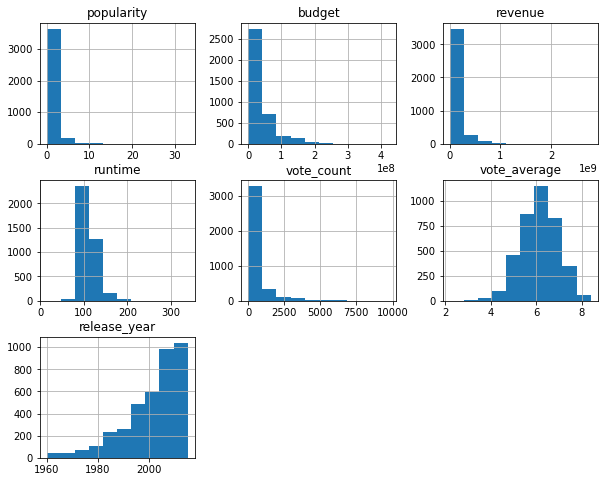

In [68]:
# explore the data.
df.hist(figsize=(10,8));

### Q1: What properties are associated with highly rated movies?

*There are two rows that can be used to understand the favorability of a movie, 'popularity' and 'vote_average'. I compare these columns with each other to identify which one will be more helpful in answering my question.*




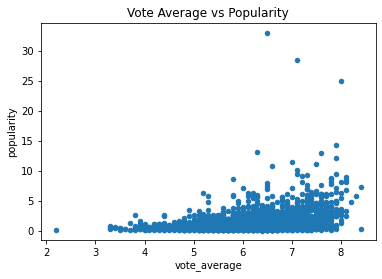

In [69]:
df.plot(x='vote_average',y='popularity',kind='scatter')
plt.title('Vote Average vs Popularity')
plt.show()

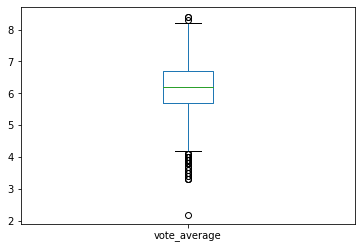

In [70]:
df['vote_average'].plot(kind='box')
plt.show()

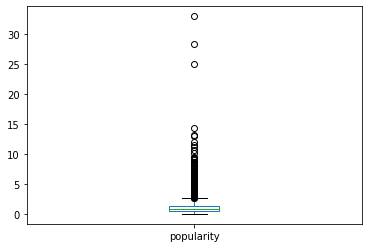

In [71]:
df['popularity'].plot(kind='box')
plt.show()

*I want to first check to make sure that both 'popularity' and 'vote_average' represent the same thing. The scatter plot above illustrates that both columns are positively correlated. However, as shown by the box plots, 'vote_average' is more evenly distributed and lacks any outliers. Therefore, all following analysis will be done with 'vote_average'.*

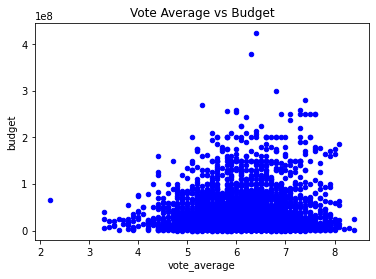

In [72]:
df.plot(x='vote_average',y='budget',kind='scatter', color = 'blue')
plt.title('Vote Average vs Budget')
plt.show()

*This scatter plot illustrates a positive correlation, which means that movies with higher budgets tend be more highly voted by viewers.*

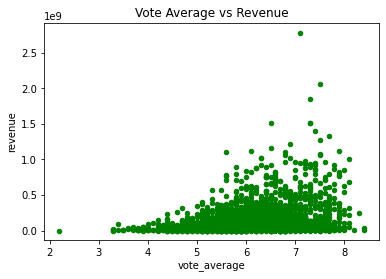

In [73]:
df.plot(x='vote_average',y='revenue',kind='scatter', color = 'green')
plt.title('Vote Average vs Revenue')
plt.show()

*The above plot also indicates a positive correlation between revenue and vote average. This means that movies that are more highly rated by viewers tend to make more in revenue.*

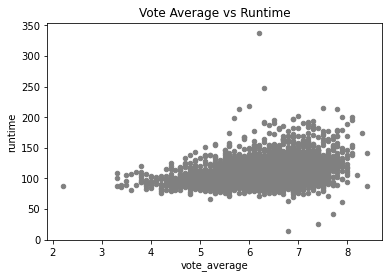

In [74]:
df.plot(x='vote_average',y='runtime',kind='scatter', color = 'gray')
plt.title('Vote Average vs Runtime')
plt.show()

*This scatter plot suggests a weaker relationship between vote average and runtime. Though it appears that the longest movies have a higher vote average, there doesn't seem to be a decisive pattern between the two variables in general.*



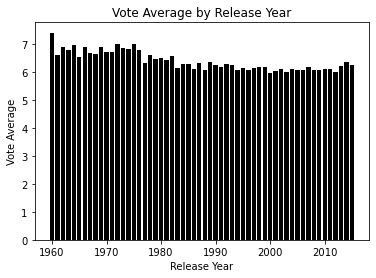

In [75]:
yearly_df = df.groupby('release_year').mean()
plt.bar(yearly_df.index,yearly_df['vote_average'], color = 'black')
plt.title('Vote Average by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Vote Average')
plt.show()

*To create the above chart, I made a new dataframe that grouped the movies by release year. Then I plotted the vote average by release year on a bar chart.*

*In this bar chart, there seems to be a slight downward slope in vote average over time. Though there isn't necessarily a clear trend, it is safe to say that the most highly voted movies on TMDb were released between 1960 and 1980.*

## Q2: Is the movie rating influence the revenue?

In [76]:
# Counting the revenue average 
revenue_ave = df['revenue'].mean()
revenue_ave

107686616.09807992

>**Now I wil divide the revenue into 2 section**

> - Movies below or equal the avarage revenue
> - Movies Above the avarage revenue.

In [77]:
higher_revenue = df['revenue'] > revenue_ave
lower_revenue = df['revenue'] <= revenue_ave

In [78]:
higher_revenue.value_counts()

False    2747
True     1107
Name: revenue, dtype: int64

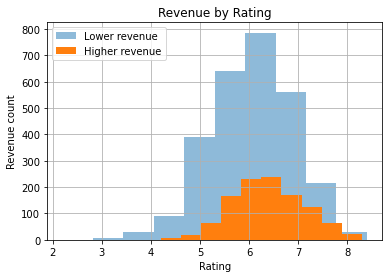

In [79]:
df.vote_average[lower_revenue].hist(alpha=0.5, label='Lower revenue')
df.vote_average[higher_revenue].hist(label='Higher revenue')
plt.title('Revenue by Rating')
plt.xlabel('Rating')
plt.ylabel('Revenue count')
plt.legend();

> **As we can see above the Lower revenue has no relevance how good the raiting is. But it may effect on the bad rating. So on the histogram, we can see that all the lower_revenue and higher_revenue are equal on the good rating but on the other hand approximately only the lower revenue who gets the low voting.**



## Q3: Are higher budget movie get higher revinue?

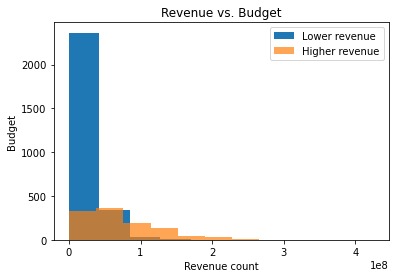

In [80]:
df.budget[lower_revenue].plot(kind='hist' ,label='Lower revenue')
df.budget[higher_revenue].plot(kind='hist' ,alpha=0.7 ,label='Higher revenue')
plt.title('Revenue vs. Budget')
plt.ylabel('Budget')
plt.xlabel('Revenue count')
plt.legend();

> **Unexpectedly the result shows that the movies that had a lower budget had more revenue.**

## Q4: What other properties reflect the movies that have high revenues?

>**Here, we're going to explore the other columns**

Text(0, 0.5, 'Revenue count')

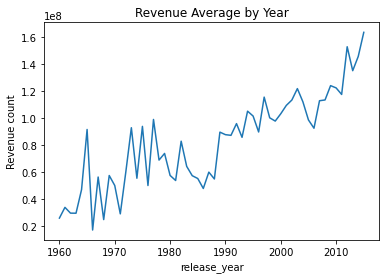

In [81]:
#check the average revenue for each year
df.groupby('release_year')['revenue'].mean().plot(kind='line');
plt.title('Revenue Average by Year')
plt.ylabel('Revenue count')

> The chart above shows that the revenue became higher in the latest years.

<a id='conclusions'></a>
## Conclusions

*There are many qualities about movies that make them unique from one another. In this project, I was able to analyze these qualities and identify which properties are associated with movie popularity.*

*After cleaning and trimming the dataset by removing unnecessary, null, and duplicated values, I created a secondary table that broke each movie down into the separate genres it falls under.*

*Then I plotted a few charts to assess what will be used as the dependent variable, popularity or vote average. Because vote average was more evenly distributed, I used this as the variable that indicates favorability among viewers.*

*Next, I plotted various other variables against vote average and found that movies with higher vote averages tend to have higher budgets and higher revenue. I also found that movies released between 1960-1980, documentaries, history movies, and music movies tend to be voted higher than others.*

*Since my analysis only illustrates correlation between variables, it does not definitively conclude whether any trait can predict the vote average of a movie. That would require deeper statistical analysis that was not performed in this project.*